# Morphological closing to link edges.

Goal of this notebook is to explain visually the morphological sequence:

dilation + erosion = closing

Before continuing with this notebook, I'd recommend reading about morphological erosion, dilation, and closing on the Scikit-image website:

http://scikit-image.org/docs/dev/auto_examples/applications/plot_morphology

and on the imagemagik user guide: 

http://www.imagemagick.org/Usage/morphology/#dilate

http://www.imagemagick.org/Usage/morphology/#erode

http://www.imagemagick.org/Usage/morphology/#close

When applying closing to a binary image, the external points in any object in the input image will be left unchanged in the output, but indentations will be smoothed and holes closed, partially or completely. Disconnected objects like edges (or lines in sketches) that are close, can become connected.

We will now demonstrate it.

Let's start with importing some libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import disk, octagon, dilation, closing, erosion
from copy import deepcopy
%matplotlib inline

The first thing to do is to load some made-up edges, not connected, and plotting them:

In [2]:
edges = 1 - np.loadtxt('edges.txt', delimiter=',')

[]

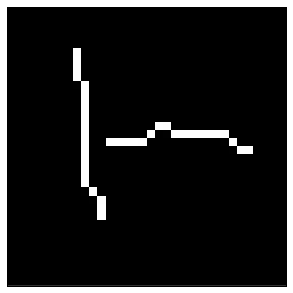

In [3]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

plt.imshow(edges, cmap='gray', interpolation = 'none')

ax.set_xticks([])
ax.set_yticks([])

#fig.savefig('edges.png', dpi=200, bbox_inches='tight', pad_inches=0)

And now we want to link these edges using morphological closing (equivalent todilation followed by erosion) with a disk-shaped structuring element of size 2.

[]

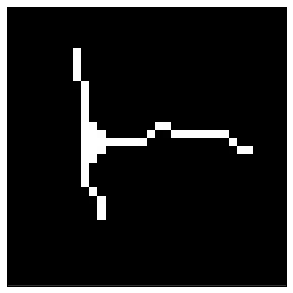

In [4]:
closed = closing(edges, disk(2))

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

plt.imshow(closed, cmap='gray', interpolation = 'none')

ax.set_xticks([])
ax.set_yticks([])

#fig.savefig('closed_edges.png', dpi=200, bbox_inches='tight', pad_inches=0)

It worked!

Question: wat happens with a smaller structuring element?

[]

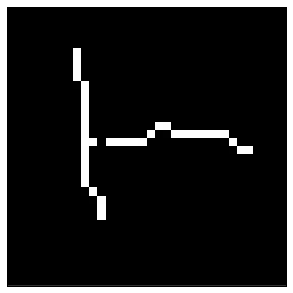

In [5]:
not_closed = closing(edges, disk(1))

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

plt.imshow(not_closed, cmap='gray', interpolation = 'none')

ax.set_xticks([])
ax.set_yticks([])

#fig.savefig('non_closed_edges.png', dpi=200, bbox_inches='tight', pad_inches=0)

This time the closing magic did not happen, and in the remainder of the notebook I want to illustrate visually why it did not.

Let's begin by breaking down the closing into its component dilation and erosion, and plot step by step what happens:

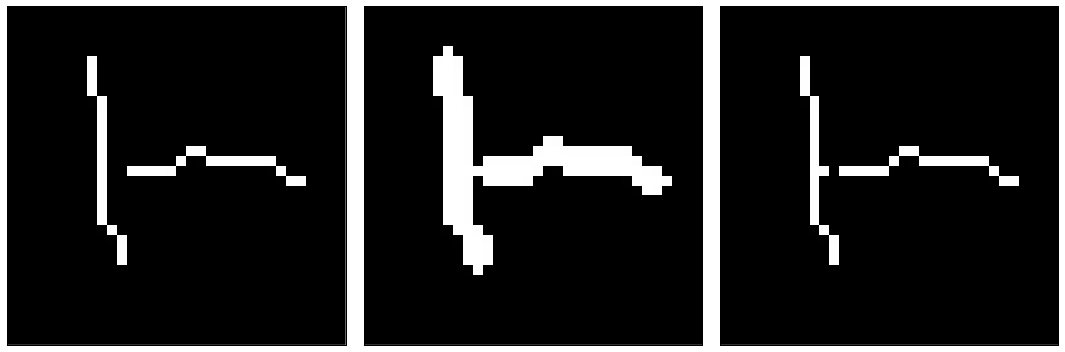

In [6]:
one = dilation(edges, disk(1))
two = erosion(one, disk(1))

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
plt.imshow(edges, cmap='gray', interpolation = 'none')
ax.set_xticks([])
ax.set_yticks([])

ax1 = fig.add_subplot(1, 3, 2)
plt.imshow(one, cmap='gray', interpolation = 'none')
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(1, 3, 3)
plt.imshow(two, cmap='gray', interpolation = 'none')
ax2.set_xticks([])
ax2.set_yticks([])
plt.tight_layout()

#fig.savefig('non_closed_break.png', dpi=200, bbox_inches='tight', pad_inches=0)

That plot is nice but let's superimpose the input on top of the dilated edge in the middle subplot so 
that we can follow better what happens:

In [7]:
zero = deepcopy(edges)
zero[zero==0] = np.nan

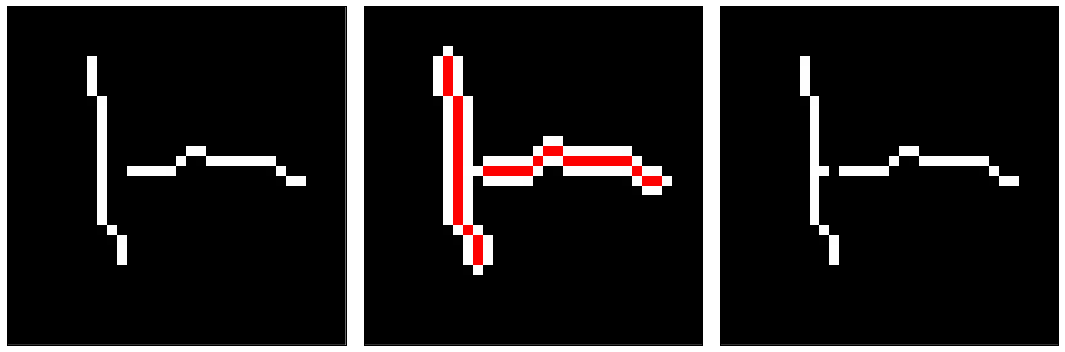

In [8]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
plt.imshow(edges, cmap='gray', interpolation = 'none')
ax.set_xticks([])
ax.set_yticks([])

ax1 = fig.add_subplot(1, 3, 2)
plt.imshow(one, cmap='gray', interpolation = 'none')
plt.imshow(zero, cmap='flag', interpolation = 'none')
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(1, 3, 3)
plt.imshow(two, cmap='gray', interpolation = 'none')
ax2.set_xticks([])
ax2.set_yticks([])
plt.tight_layout()

#fig.savefig('non_closed_break_red.png', dpi=200, bbox_inches='tight', pad_inches=0)

We can also superinpose the dilated edge as a background to the final eroded edge in the last subplot on the right. This will take a slightly different manipulation to get the color right.

In [9]:
zero1 = 1-deepcopy(edges)
zero1[zero1==1] = np.nan

Ah, and some labels to explain the color coding.

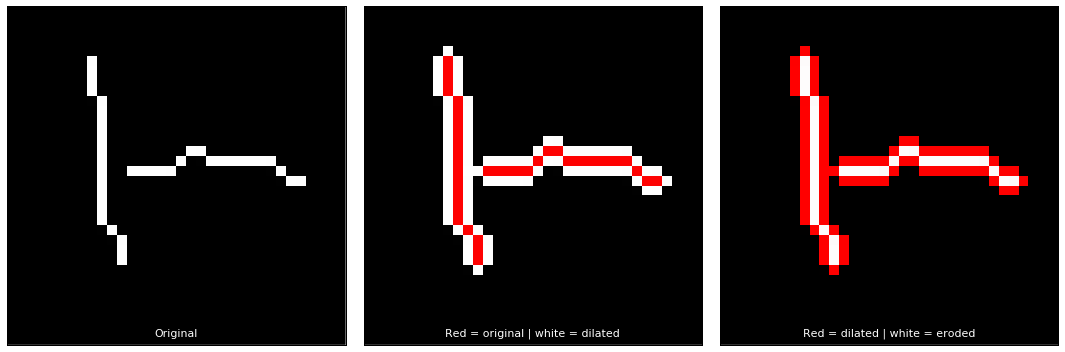

In [10]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
plt.imshow(edges, cmap='gray', interpolation = 'none')
ax.set_xticks([])
ax.set_yticks([])
ax.text(0.5, 0.02, 'Original',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes,
        color='w', fontsize=11)

ax1 = fig.add_subplot(1, 3, 2)
plt.imshow(one, cmap='gray', interpolation = 'none')
plt.imshow(zero, cmap='flag', interpolation = 'none')
ax1.set_xticks([])
ax1.set_yticks([])

ax1.text(0.5, 0.02, 'Red = original | white = dilated',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax1.transAxes,
        color='w', fontsize=11)

ax2 = fig.add_subplot(1, 3, 3)
plt.imshow(one, cmap='flag_r', interpolation = 'none')
plt.imshow(zero1, cmap='gray_r', interpolation = 'none')
ax2.set_xticks([])
ax2.set_yticks([])

ax2.text(0.5, 0.02, 'Red = dilated | white = eroded',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax2.transAxes,
        color='w', fontsize=11)
plt.tight_layout()

#fig.savefig('non_closed_break_red_two.png', dpi=200, bbox_inches='tight', pad_inches=0)

So we see that the edges do get linked by the dilation, but by only one pixel, which the following erosion then removes.
For the edges to stay connected we need to increase the amount of dilation (e.g. the size of the disk to 2 as in [4], or the equivalent two consecutive passes with a disk of size one as in the demonstration below). 

By the way, if we observed carefully the second panel above we could predict that the dilation with a disk of size two would result in a link 3-pixel wide instead of 1-pixel wide, which the subsequent erosion will not disconnect. 

In [11]:
alpha = dilation(edges, disk(1))
bravo = dilation(alpha, disk(1))
charlie = erosion(bravo, disk(1))
delta = erosion(charlie, disk(1))

As before we will need a few manipulations for display purposes.

In [12]:
z = deepcopy(edges)
z[z==0] = np.nan

alpha1 = deepcopy(alpha)
alpha1[alpha1==0] = np.nan

bravo1 = 1-deepcopy(alpha)
bravo1[bravo1==1] = np.nan

charlie1 = 1-deepcopy(delta)
charlie1[charlie1==1] = np.nan

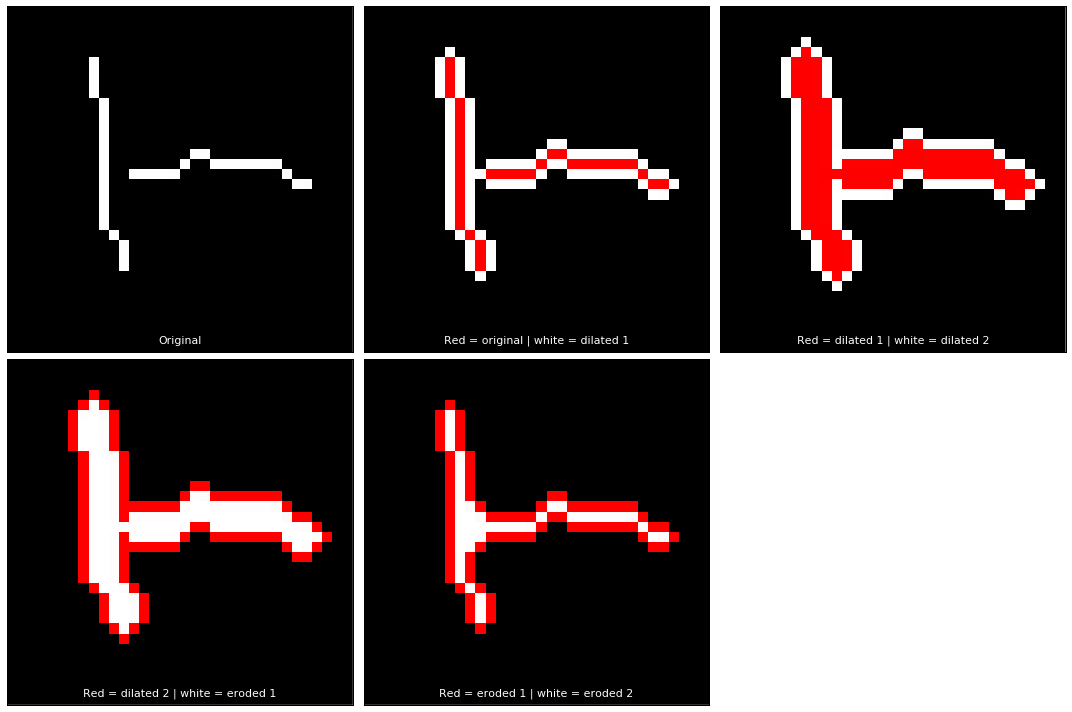

In [13]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(2, 3, 1)
plt.imshow(edges, cmap='gray', interpolation = 'none')
ax.set_xticks([])
ax.set_yticks([])
ax.text(0.5, 0.02, 'Original',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes,
        color='w', fontsize=11)

ax1 = fig.add_subplot(2, 3, 2)
plt.imshow(alpha, cmap='gray', interpolation = 'none')
plt.imshow(z, cmap='flag', interpolation = 'none')
ax1.set_xticks([])
ax1.set_yticks([])

ax1.text(0.5, 0.02, 'Red = original | white = dilated 1',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax1.transAxes,
        color='w', fontsize=11)

ax2 = fig.add_subplot(2, 3, 3)
plt.imshow(bravo, cmap='gray', interpolation = 'none')
plt.imshow(alpha1, cmap='flag', interpolation = 'none')
ax2.set_xticks([])
ax2.set_yticks([])

ax2.text(0.5, 0.02, 'Red = dilated 1 | white = dilated 2',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax2.transAxes,
        color='w', fontsize=11)


ax3 = fig.add_subplot(2, 3, 4)

plt.imshow(bravo, cmap='flag_r', interpolation = 'none')
plt.imshow(bravo1, cmap='gray_r', interpolation = 'none')

ax3.set_xticks([])
ax3.set_yticks([])

ax3.text(0.5, 0.02, 'Red = dilated 2 | white = eroded 1',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax3.transAxes,
        color='w', fontsize=11)

ax4 = fig.add_subplot(2, 3, 5)

plt.imshow(charlie, cmap='flag_r', interpolation = 'none')
plt.imshow(charlie1, cmap='gray_r', interpolation = 'none')

ax4.set_xticks([])
ax4.set_yticks([])

ax4.text(0.5, 0.02, 'Red = eroded 1 | white = eroded 2',
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax4.transAxes,
        color='w', fontsize=11)

plt.tight_layout()

#fig.savefig('closed_break_red.png', dpi=200, bbox_inches='tight', pad_inches=0)

A final analogy, to cement the understanding of closing: I like to think of the mechanics of this morphological operation as the combination of peeling back an onion layer by layer (the erosion step), after having added them one on top of the other ourselves (the dilation step).

And here's another nice description, with examples: http://homepages.inf.ed.ac.uk/rbf/HIPR2/close.htm